Import Libaries

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv("swiv.csv")

In [9]:
data.head()


,name,phrase,numberOfWords
0,C3PO,Did you hear that They've shut down the main r...,18
1,C3PO,We're doomed,2
2,C3PO,There'll be no escape for the Princess this time,9
3,C3PO,What's that,2
4,C3PO,I should have known better than to trust the l...,16


How many times does an actor say something?

In [10]:
actor_names = data['name'].value_counts()
top_actor_names = actor_names.head(13)
print(top_actor_names)


LUKE           252
HAN            151
C3PO           119
BEN             75
LEIA            57
VADER           42
BIGGS           34
RED LEADER      34
TARKIN          28
OWEN            25
TROOPER         19
WEDGE           14
GOLD LEADER     14
Name: name, dtype: int64


In [11]:
top_actor_names = top_actor_names.drop(['RED LEADER','TROOPER','GOLD LEADER'], axis=0)

In [12]:
actorDF = pd.DataFrame()
indexList=[]

actorDF['actor'] = top_actor_names.index
for i in range(len(top_actor_names)):
    indexList.append(top_actor_names.iloc[i])
    
indexDF = pd.DataFrame(indexList)  
actorDF['timesSpoken'] = indexDF

In [13]:
actorDF

,actor,timesSpoken
0,LUKE,252
1,HAN,151
2,C3PO,119
3,BEN,75
4,LEIA,57
5,VADER,42
6,BIGGS,34
7,TARKIN,28
8,OWEN,25
9,WEDGE,14


In [14]:
#access name via index 
print(top_actor_names.index[0])
# access number of mentioned name via iloc
print(top_actor_names.iloc[0])

LUKE
252


Add gender column

In [15]:
gender = []
gender.append('male')
gender.append('male')
gender.append('none')
gender.append('male')
gender.append('female')
gender.append('male')
gender.append('male')
gender.append('male')
gender.append('male')
gender.append('female')
genderDF = pd.DataFrame(gender)
actorDF['gender'] = genderDF

In [16]:
print(actorDF)

    actor  timesSpoken  gender
0    LUKE          252    male
1     HAN          151    male
2    C3PO          119    none
3     BEN           75    male
4    LEIA           57  female
5   VADER           42    male
6   BIGGS           34    male
7  TARKIN           28    male
8    OWEN           25    male
9   WEDGE           14  female


How many words does each of the top actors say?

In [17]:
top_actors_count = len(top_actor_names)
numberList = [] 

for i in range(len(top_actor_names)):
    indexActor = top_actor_names.index[i]
    nameActor = data[data['name']==indexActor]
    numberList.append(nameActor['numberOfWords'].sum())
    
    
numberDF = pd.DataFrame(numberList)
actorDF['numberOfWords'] = numberDF

In [18]:
actorDF

,actor,timesSpoken,gender,numberOfWords
0,LUKE,252,male,2480
1,HAN,151,male,1728
2,C3PO,119,none,1498
3,BEN,75,male,995
4,LEIA,57,female,634
5,VADER,42,male,492
6,BIGGS,34,male,520
7,TARKIN,28,male,409
8,OWEN,25,male,310
9,WEDGE,14,female,82


Bubble charts

In [28]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(actorDF, x="numberOfWords", y="timesSpoken", color="gender", hover_name="actor", log_x=True, size_max=60, width=1000, 
title="Scatterplot of times spoken and number of words for each character. <br>To see which character has spoken how many times and how many words, hover above each point.")
fig.show()


In [ ]:
male = actorDF[actorDF['gender']=="male"]
print(male)
male['numberOfWords'].sum()
numberOfWordsMale = male['numberOfWords'].sum()

female = actorDF[actorDF['gender']=="female"]
print(female)
female['numberOfWords'].sum()
numberOfWordsFemale = female['numberOfWords'].sum()

none = actorDF[actorDF['gender']=="none"]
print(none)
none['numberOfWords'].sum()
numberOfWordsNone = none['numberOfWords'].sum()

    actor  timesSpoken gender  numberOfWords
0    LUKE          229   male           2345
1     HAN          145   male           1691
3     BEN           75   male            995
5   VADER           33   male            444
6  TARKIN           26   male            394
7    OWEN           25   male            311
8   BIGGS           24   male            454
       actor  timesSpoken  gender  numberOfWords
4       LEIA           55  female            623
9  AUNT BERU            6  female             61
      actor  timesSpoken gender  numberOfWords
2  THREEPIO          116   none           1470


[6634, 684, 1470]


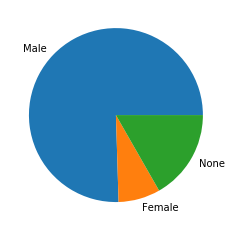

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


genderData = [numberOfWordsMale, numberOfWordsFemale, numberOfWordsNone]
print(genderData)
genderLabel = ['Male', 'Female', 'None']

plt.pie(genderData, labels=genderLabel)
plt.show()
plt.savefig('numberOfWordsGender.png')

In [ ]:
male = actorDF[actorDF['gender']=="male"]
print(male)
male['timesSpoken'].sum()
timesSpokenMale = male['timesSpoken'].sum()

female = actorDF[actorDF['gender']=="female"]
print(female)
female['timesSpoken'].sum()
timesSpokenFemale = female['timesSpoken'].sum()

none = actorDF[actorDF['gender']=="none"]
print(none)
none['timesSpoken'].sum()
timesSpokenNone = none['timesSpoken'].sum()

    actor  timesSpoken gender  numberOfWords
0    LUKE          229   male           2345
1     HAN          145   male           1691
3     BEN           75   male            995
5   VADER           33   male            444
6  TARKIN           26   male            394
7    OWEN           25   male            311
8   BIGGS           24   male            454
       actor  timesSpoken  gender  numberOfWords
4       LEIA           55  female            623
9  AUNT BERU            6  female             61
      actor  timesSpoken gender  numberOfWords
2  THREEPIO          116   none           1470


[557, 61, 116]


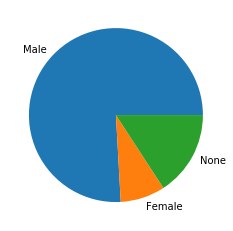

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


genderData = [timesSpokenMale, timesSpokenFemale, timesSpokenNone]
print(genderData)
genderLabel = ['Male', 'Female', 'None']

plt.pie(genderData, labels=genderLabel)
plt.show()
plt.savefig('timesSpokenGender.png')